# [Hypothesis] Female employment in industrial sector results in crimes


Following crimes are identified to be related to this,

 1. Abduction/ Kidnapping (0.8)
 2. H.B. & Theft (0.77)
 3. Hurt by knife (0.83).

**Imports and workspace setting**

In [20]:
import csv
import math
import os

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
integrated_data = pd.read_csv('../data/integrated_data.csv')
print("Data set size : ", integrated_data.shape)
integrated_data = integrated_data.drop(integrated_data.columns[[0, 2, 3, 4, 5, 6, 22, 23, 25, 26, 27, 28, 29, 30, 31,32, 33, 34]], axis=1)
integrated_data.head()

Data set size :  (26, 38)


,District,Female emp. Agriculture,Female emp. Industry,Female emp. Services,Female emp. Total,Total emp. Agriculture,Total emp. Industry,Total emp. Services,Total employment,Abduction / Kidnapping,Arson,Mischief over Rs.5000/=,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Riot,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs",2012
0,Ampara,1.8,4.1,44.7,50.6,11.3,15.9,30.6,57.8,29.0,31.0,36.0,239.0,69.0,38.0,16.0,1.0,0.0,1.0,648.06
1,Anuradhapura,1.7,5.5,18.0,25.2,2.9,5.8,23.5,32.2,68.0,47.0,107.0,834.0,108.0,72.0,24.0,4.0,1.0,7.0,856.23
2,Badulla,23.7,4.8,17.3,45.8,19.6,7.9,19.9,47.4,38.0,14.0,42.0,359.0,112.0,85.0,28.0,3.0,0.0,20.0,811.76
3,Batticaloa,2.1,4.0,33.2,39.3,16.6,14.8,27.6,59.0,21.0,33.0,38.0,227.0,56.0,89.0,11.0,0.0,1.0,3.0,525.14
4,Colombo,1.3,20.0,50.5,71.7,1.2,20.4,45.4,67.0,154.0,22.0,140.0,2996.0,248.0,379.0,62.0,3.0,6.0,573.0,2309.81


**Normalizing crime data with population**

In [22]:
integrated_data['Abduction / Kidnapping'] = integrated_data['Abduction / Kidnapping']/integrated_data['2012']
integrated_data['H.B. & Theft'] = integrated_data['H.B. & Theft']/integrated_data['2012']
integrated_data['Hurt  by Knife etc.'] = integrated_data['Hurt  by Knife etc.']/integrated_data['2012']
integrated_data['Homicide/Abet. To commit suicide'] = integrated_data['Homicide/Abet. To commit suicide']/integrated_data['2012']

**Correlation analysis with female employment in industry**

Text(0.5, 1.0, 'Female employment in industrial sector Correlation')

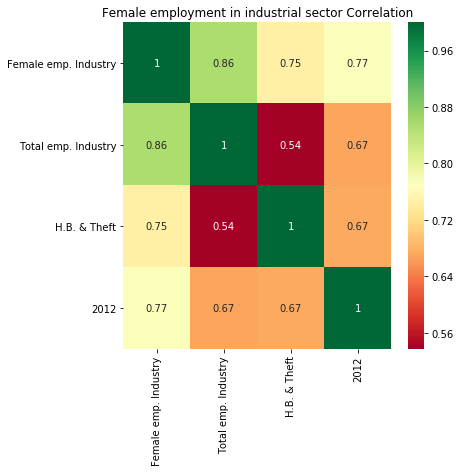

In [23]:
allCorrelations = integrated_data.corr(method='pearson')

## Extract high correlations to Drugs
topCorrFeatures = allCorrelations.index[abs(allCorrelations['Female emp. Industry']) >= 0.6]
plt.figure(figsize=(6,6))
ax = sns.heatmap(integrated_data[topCorrFeatures].corr(), annot=True, cmap="RdYlGn")
ax.set_title('Female employment in industrial sector Correlation')

**Visualizing relation between female employment and crimes mentioned**

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


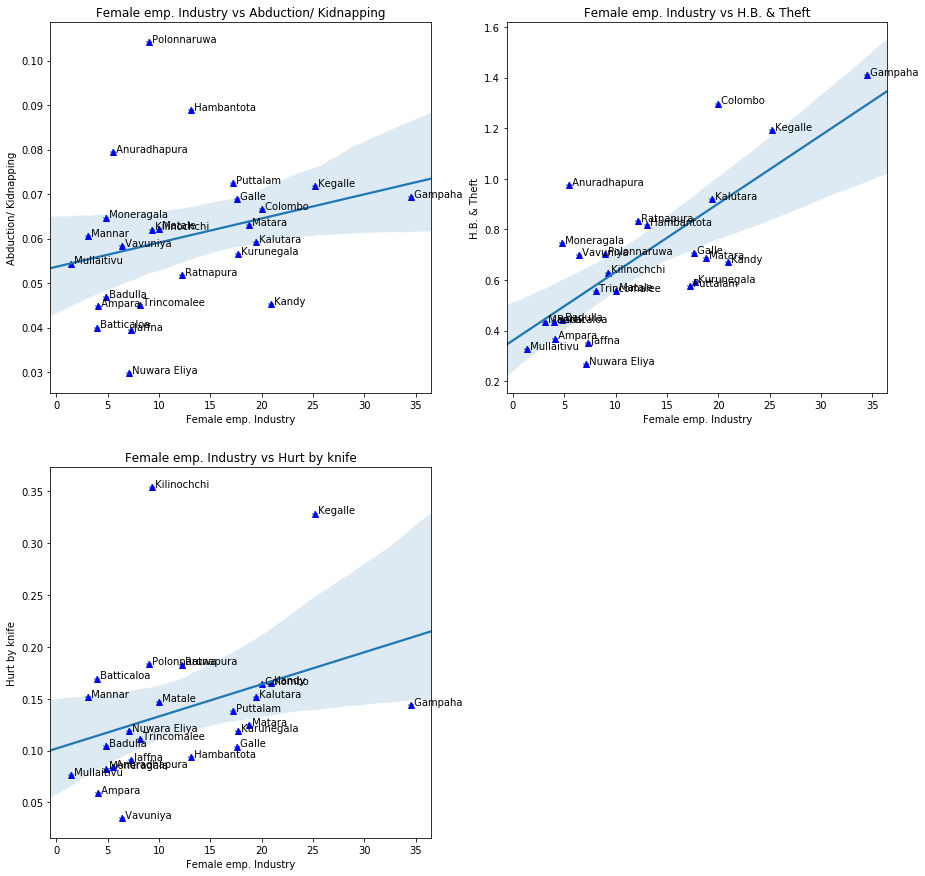

In [24]:
def plotScatterForCrime (column, tag, subPlotIndex):
    plt.subplot(2,2,subPlotIndex)
    plt.plot(integrated_data['Female emp. Industry'],  integrated_data[column], 'b^')

    for i, txt in enumerate(integrated_data['District']):
        if integrated_data['Female emp. Industry'][i] >= 1:
            plt.annotate(' ' + txt, (integrated_data['Female emp. Industry'][i], integrated_data[column][i]))
    
    x, y = pd.Series(integrated_data['Female emp. Industry'], name="x_var"), pd.Series(integrated_data[column], name="y_var")
    ax = sns.regplot(x=x, y=y, marker="+")
    
    plt.title('Female emp. Industry vs ' + tag)
    plt.xlabel("Female emp. Industry")
    plt.ylabel(tag)

plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.2)

plotScatterForCrime('Abduction / Kidnapping', "Abduction/ Kidnapping", 1)
plotScatterForCrime('H.B. & Theft', "H.B. & Theft", 2)
plotScatterForCrime('Hurt  by Knife etc.', "Hurt by knife", 3)

**Histograms of crime variables**

Text(0.5, 0, 'Hurt  by Knife etc.')

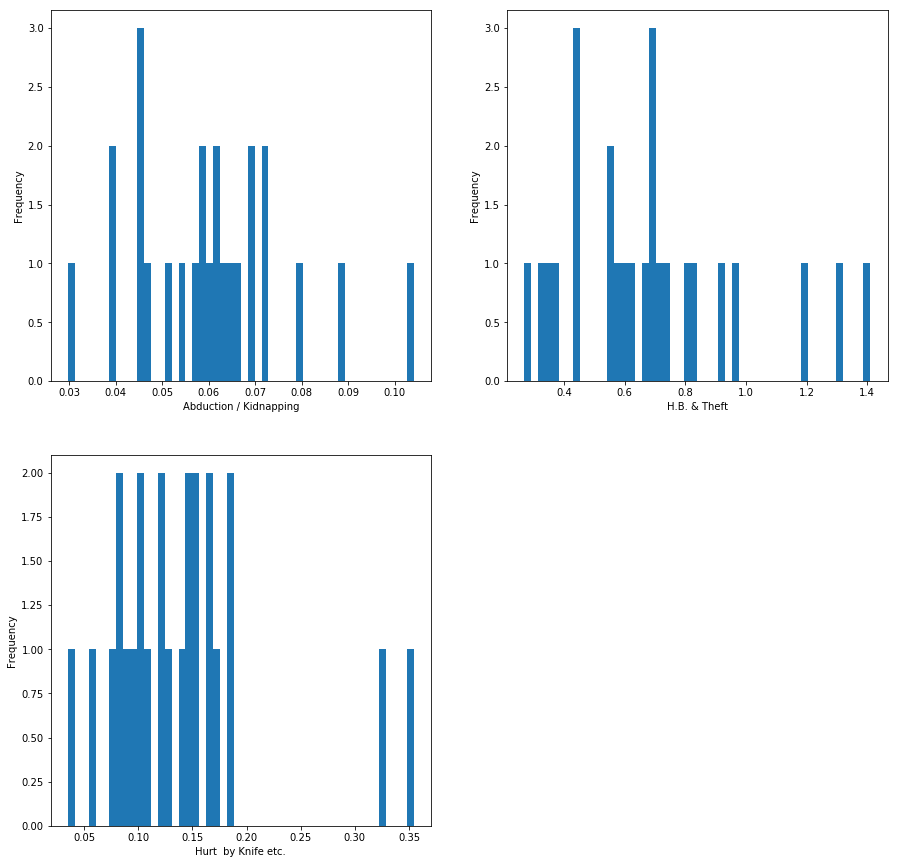

In [25]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.2)

plt.subplot(2,2,1)
integrated_data['Abduction / Kidnapping'].plot(kind='hist', bins=50)
plt.xlabel('Abduction / Kidnapping')

plt.subplot(2,2,2)
integrated_data['H.B. & Theft'].plot(kind='hist', bins=50)
plt.xlabel('H.B. & Theft')

plt.subplot(2,2,3)
integrated_data['Hurt  by Knife etc.'].plot(kind='hist', bins=50)
plt.xlabel('Hurt  by Knife etc.')

**Prove normalty of crimes**

In [26]:
value, p = stat.normaltest(integrated_data['H.B. & Theft'].dropna())

print(value, p)
if p >= 0.05:
    print('It is likely that H.B. & Theft are normally distributed.')
else:
    print('It is unlikely that H.B. & Theft are normally distributed.', p, value)

4.592301745464566 0.10064549643237067
It is likely that H.B. & Theft are normally distributed.


In [27]:
value, p = stat.normaltest(integrated_data['Abduction / Kidnapping'].dropna())

print(value, p)
if p >= 0.05:
    print('It is likely that Abduction / Kidnapping are normally distributed.')
else:
    print('It is unlikely that Abduction / Kidnapping are normally distributed.', p, value)

3.5571303935374905 0.16888028349458936
It is likely that Abduction / Kidnapping are normally distributed.


In [28]:
value, p = stat.normaltest(integrated_data['Hurt  by Knife etc.'].dropna())

print(value, p)
if p >= 0.00005:
    print('It is likely that Hurt by Knife etc. are normally distributed.')
else:
    print('It is unlikely that Hurt by Knife etc. are normally distributed.', p, value)

17.20273443793128 0.00018385425272974653
It is likely that Hurt by Knife etc. are normally distributed.


**BoxPlot for data for H.B. & Theft crime**

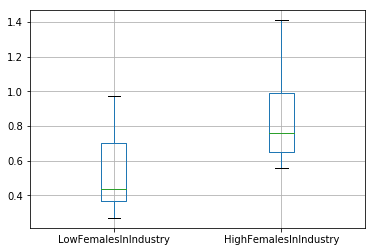

In [29]:
integrated_data.sort_values(by='Female emp. Industry', inplace=True)

boxplot_data = pd.DataFrame(columns = ['LowFemalesInIndustry', 'HighFemalesInIndustry'])
boxplot_data['LowFemalesInIndustry'] = integrated_data[:12]['H.B. & Theft'].tolist()
boxplot_data['HighFemalesInIndustry'] = integrated_data[13:]['H.B. & Theft'].dropna().tolist()

boxplot_data.boxplot(column=['LowFemalesInIndustry', 'HighFemalesInIndustry'])

**Stats about low and high samples**

In [30]:
## Low Female emp. Industry sample
low_sample = integrated_data[:12]
low_sample.describe()

,Female emp. Agriculture,Female emp. Industry,Female emp. Services,Female emp. Total,Total emp. Agriculture,Total emp. Industry,Total emp. Services,Total employment,Abduction / Kidnapping,Arson,Mischief over Rs.5000/=,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Riot,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs",2012
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,10.391667,5.466667,31.675000,47.508333,13.108333,10.975000,25.575000,49.641667,0.055597,18.083333,33.25000,0.524852,53.916667,0.105524,0.034434,0.750000,0.500000,7.583333,476.944167
std,15.013537,2.202616,15.906438,16.060933,10.873024,4.373708,6.111409,11.944375,0.020277,13.097247,26.78916,0.212501,35.991055,0.044440,0.011952,1.356801,0.904534,12.652404,261.454811
min,0.000000,1.400000,10.700000,25.200000,2.600000,5.200000,15.900000,31.700000,0.029720,4.000000,3.00000,0.268897,11.000000,0.034983,0.020947,0.000000,0.000000,0.000000,91.950000
25%,1.875000,4.075000,17.925000,36.950000,8.050000,8.200000,22.000000,42.850000,0.043559,8.500000,16.75000,0.364016,24.000000,0.080955,0.024532,0.000000,0.000000,1.000000,326.512500
50%,3.300000,5.150000,32.800000,47.550000,10.300000,9.650000,25.750000,51.150000,0.050595,15.000000,31.50000,0.438187,49.000000,0.097780,0.033501,0.000000,0.000000,3.000000,486.640000
75%,12.100000,7.150000,41.525000,59.100000,15.025000,15.075000,30.725000,58.100000,0.061610,25.000000,39.00000,0.700161,75.750000,0.127020,0.039665,1.000000,1.000000,5.500000,662.692500
max,52.400000,9.000000,66.500000,72.900000,43.700000,18.500000,34.100000,68.500000,0.104131,47.000000,107.00000,0.974037,112.000000,0.183468,0.058306,4.000000,3.000000,44.000000,856.230000


In [31]:
## High Female emp. Industry sample
high_sample = integrated_data[12:]
high_sample.describe()

,Female emp. Agriculture,Female emp. Industry,Female emp. Services,Female emp. Total,Total emp. Agriculture,Total emp. Industry,Total emp. Services,Total employment,Abduction / Kidnapping,Arson,Mischief over Rs.5000/=,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Riot,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs",2012
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,14.000000
mean,9.600000,18.146154,29.415385,57.161538,8.876923,19.746154,27.530769,56.161538,0.064443,28.307692,53.538462,0.837184,83.000000,0.170607,0.032661,0.461538,1.769231,72.076923,1078.430885
std,6.437261,6.689870,9.745242,11.821628,4.585331,4.656289,7.808477,9.227453,0.010774,14.320059,35.813441,0.287262,63.818754,0.079984,0.007902,0.877058,1.877669,153.271253,644.892998
min,1.000000,9.300000,17.000000,34.600000,1.200000,12.800000,16.300000,41.300000,0.045259,3.000000,6.000000,0.557825,16.000000,0.093862,0.014600,0.000000,0.000000,0.000000,112.880000
25%,6.100000,13.100000,22.400000,51.100000,6.800000,18.000000,24.000000,50.100000,0.059149,21.000000,29.000000,0.628987,40.000000,0.124793,0.028956,0.000000,1.000000,10.000000,637.410000
50%,7.200000,17.700000,27.100000,59.100000,7.900000,19.900000,24.600000,59.000000,0.063014,27.000000,50.000000,0.706480,66.000000,0.147233,0.033121,0.000000,1.000000,20.000000,947.685000
75%,14.800000,20.000000,35.200000,65.600000,12.900000,20.400000,34.300000,65.000000,0.069292,38.000000,68.000000,0.920099,101.000000,0.164976,0.035832,1.000000,2.000000,65.000000,1331.740000
max,22.500000,34.500000,50.500000,71.700000,16.500000,32.400000,45.400000,69.400000,0.088834,53.000000,140.000000,1.409807,248.000000,0.354359,0.047225,3.000000,6.000000,573.000000,2309.810000


**Distribution plots for 3 crimes**

In [32]:
def plotDistributionPlot(column):
    fig, ax = plt.subplots(figsize=(8,4))
    
    low_sample.sort_values(by=column, inplace=True)
    high_sample.sort_values(by=column, inplace=True)

    low_sample_fit = stat.norm.pdf(low_sample[column], low_sample[column].mean(), low_sample[column].std())
    ax.plot(low_sample[column], low_sample_fit, label='Low Female emp. Industry sample')

    high_sample_fit = stat.norm.pdf(high_sample[column], high_sample[column].mean(), high_sample[column].std())
    ax.plot(high_sample[column], high_sample_fit, label='High Female emp. Industry sample')

    plt.title('Distribution of '+ column)
    plt.xlabel(column)
    plt.ylabel('pdf')
    plt.legend()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
E:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
E:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)


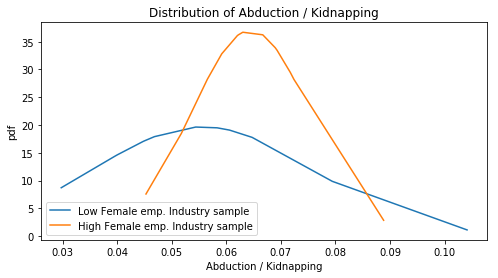

In [33]:
plotDistributionPlot('Abduction / Kidnapping')

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


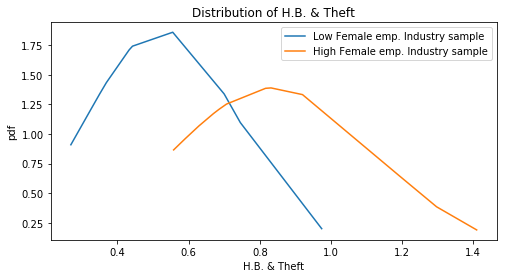

In [34]:
plotDistributionPlot('H.B. & Theft')

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


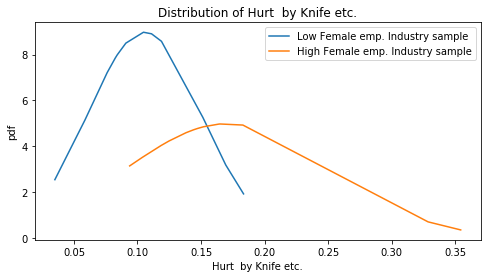

In [35]:
plotDistributionPlot('Hurt  by Knife etc.')

**Hypothesis testing**

In [42]:
statistics, p = stat.ttest_ind(high_sample['Abduction / Kidnapping'], low_sample['Abduction / Kidnapping'],nan_policy='omit')
print('Statistics=%.3f, p=%.3f' % (statistics, p))
# interpret
alpha = 0.05  # 5% area under the normal graph
if p > alpha:
	print('More Females working in Industry sector has no relation to high Abduction / Kidnapping (fail to reject H0)')
else:
	print('More Females working in Industry sector has relation to high Abduction / Kidnapping(reject H0)')

Statistics=1.378, p=0.182
More Females working in Industry sector has no relation to high Abduction / Kidnapping (fail to reject H0)


In [43]:
statistics, p = stat.ttest_ind(high_sample['Hurt  by Knife etc.'], low_sample['Hurt  by Knife etc.'], nan_policy='omit')
print('Statistics=%.3f, p=%.3f' % (statistics, p))
# interpret
alpha = 0.05  # 5% area under the normal graph
if p > alpha:
	print('More Females working in Industry sector has no relation to high Hurt by Knife etc. (fail to reject H0)')
else:
	print('More Females working in Industry sector has relation to high Hurt by Knife etc. (reject H0)')

Statistics=2.484, p=0.021
More Females working in Industry sector has relation to high Hurt by Knife etc. (reject H0)


In [44]:
statistics, p = stat.ttest_ind(high_sample['H.B. & Theft'], low_sample['H.B. & Theft'], nan_policy='omit')
print('Statistics=%.3f, p=%.3f' % (statistics, p))
# interpret
alpha = 0.05  # 5% area under the normal graph
if p > alpha:
	print('More Females working in Industry sector has no relation to high H.B. & Theft (fail to reject H0)')
else:
	print('More Females working in Industry sector has relation to high H.B. & Theft (reject H0)')

Statistics=3.068, p=0.005
More Females working in Industry sector has relation to high H.B. & Theft (reject H0)
